In [811]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [812]:
df_covid = pd.read_csv('./resources/COVID19.csv',encoding='euc-kr')
df_covid

,구분별,상태별,시점,인원[명],Unnamed: 4
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN
...,...,...,...,...,...
9149,검역,신규,2021. 02. 05,7.0,NaN
9150,검역,신규,2021. 02. 06,11.0,NaN
9151,검역,신규,2021. 02. 07,27.0,NaN
9152,검역,신규,2021. 02. 08,9.0,NaN


In [813]:
df_covid.columns = ['category','state','time_stamp','num_people','unknown']
df_covid.drop(labels='unknown',axis=1,inplace=True)
df_covid.drop(labels='state',axis=1,inplace=True)
df_covid['time_stamp'] = pd.to_datetime(df_covid.time_stamp)
df_covid['num_people'].fillna(0,inplace=True)
df_covid['monthly'] = df_covid['time_stamp'].dt.to_period(freq='M')
df_covid.category.unique()
# df_covid

array(['전체', '남성', '여성', '0-9세', '10-19세', '20-29세', '30-39세', '40-49세',
       '50-59세', '60-69세', '70-79세', '80세 이상', '서울', '부산', '대구', '인천',
       '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북',
       '경남', '제주', '검역'], dtype=object)

In [814]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   category    9154 non-null   object        
 1   time_stamp  9154 non-null   datetime64[ns]
 2   num_people  9154 non-null   float64       
 3   monthly     9154 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), object(1), period[M](1)
memory usage: 286.2+ KB


In [815]:
# All
df_covid_all = df_covid[df_covid.category.values=='전체']
df_covid_all

,category,time_stamp,num_people,monthly
0,전체,2020-04-09,39.0,2020-04
1,전체,2020-04-10,27.0,2020-04
2,전체,2020-04-11,30.0,2020-04
3,전체,2020-04-12,32.0,2020-04
4,전체,2020-04-13,25.0,2020-04
...,...,...,...,...
302,전체,2021-02-05,370.0,2021-02
303,전체,2021-02-06,393.0,2021-02
304,전체,2021-02-07,371.0,2021-02
305,전체,2021-02-08,288.0,2021-02


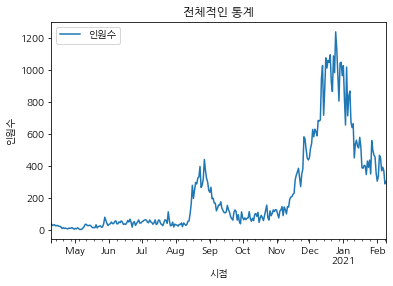

In [816]:
df_covid_all.plot(kind='line',x='time_stamp',y='num_people',xlabel='시점',ylabel='인원수',label='인원수')
plt.title('전체적인 통계')
plt.show()

In [817]:
# By gender
df_covid_gender = df_covid.loc[df_covid['category'].isin(['남성','여성'])]
df_covid_gender

,category,time_stamp,num_people,monthly
307,남성,2020-04-09,22.0,2020-04
308,남성,2020-04-10,15.0,2020-04
309,남성,2020-04-11,15.0,2020-04
310,남성,2020-04-12,14.0,2020-04
311,남성,2020-04-13,14.0,2020-04
...,...,...,...,...
906,여성,2021-02-05,184.0,2021-02
907,여성,2021-02-06,194.0,2021-02
908,여성,2021-02-07,156.0,2021-02
909,여성,2021-02-08,136.0,2021-02


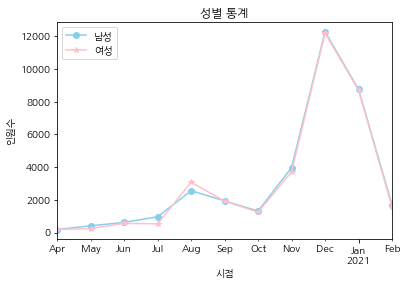

In [818]:
male = df_covid_gender[df_covid_gender.category.values=='남성'].groupby('monthly').sum()
female = df_covid_gender[df_covid_gender.category.values=='여성'].groupby('monthly').sum()

ax = male.plot(color='skyblue',y='num_people',marker='o',label='남성')
female.plot(ax=ax,y='num_people',color='pink',marker='*',label='여성')
plt.xlabel('시점')
plt.ylabel('인원수')
plt.title('성별 통계')
plt.show()

In [819]:
# By age
df_covid_age = df_covid.loc[df_covid['category'].isin(['0-9세', '10-19세', '20-29세', '30-39세', '40-49세','50-59세', '60-69세', '70-79세', '80세 이상'])]
df_covid_age

,category,time_stamp,num_people,monthly
911,0-9세,2020-04-09,2.0,2020-04
912,0-9세,2020-04-10,1.0,2020-04
913,0-9세,2020-04-11,1.0,2020-04
914,0-9세,2020-04-12,0.0,2020-04
915,0-9세,2020-04-13,2.0,2020-04
...,...,...,...,...
3623,80세 이상,2021-02-05,14.0,2021-02
3624,80세 이상,2021-02-06,13.0,2021-02
3625,80세 이상,2021-02-07,11.0,2021-02
3626,80세 이상,2021-02-08,9.0,2021-02


In [820]:
df_covid_age = df_covid_age.groupby('category').sum()
df_covid_age

,num_people
category,
0-9세,2956.0
10-19세,4725.0
20-29세,9253.0
30-39세,9001.0
40-49세,10022.0
50-59세,12872.0
60-69세,11070.0
70-79세,5355.0
80세 이상,3439.0


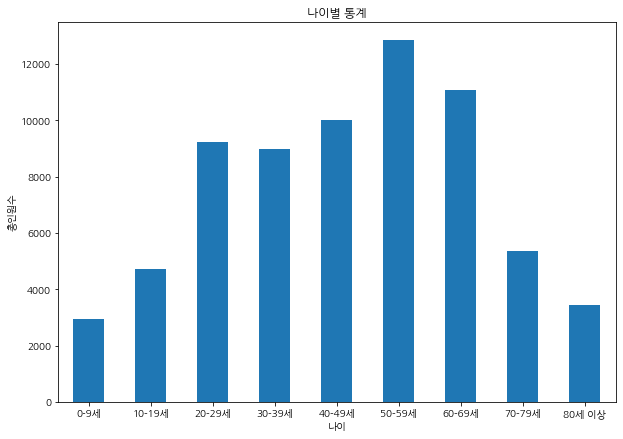

In [821]:
df_covid_age.plot(kind='bar',xlabel='나이',ylabel='총인원수',legend=None,rot=0,figsize=(10,7))
plt.title('나이별 통계')
plt.show()

In [822]:
# By region
df_covid_region = df_covid.loc[df_covid['category'].isin(['서울', '부산', '대구', '인천','광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북','경남', '제주'])]
df_covid_region

,category,time_stamp,num_people,monthly
3628,서울,2020-04-09,12.0,2020-04
3629,서울,2020-04-10,5.0,2020-04
3630,서울,2020-04-11,4.0,2020-04
3631,서울,2020-04-12,3.0,2020-04
3632,서울,2020-04-13,8.0,2020-04
...,...,...,...,...
8842,제주,2021-02-05,2.0,2021-02
8843,제주,2021-02-06,6.0,2021-02
8844,제주,2021-02-07,2.0,2021-02
8845,제주,2021-02-08,0.0,2021-02


In [823]:
df_covid_region = df_covid_region.groupby('category').sum()
df_covid_region

,num_people
category,
강원,1694.0
경기,20186.0
경남,1964.0
경북,1757.0
광주,1881.0
대구,1626.0
대전,1089.0
부산,2779.0
서울,24813.0


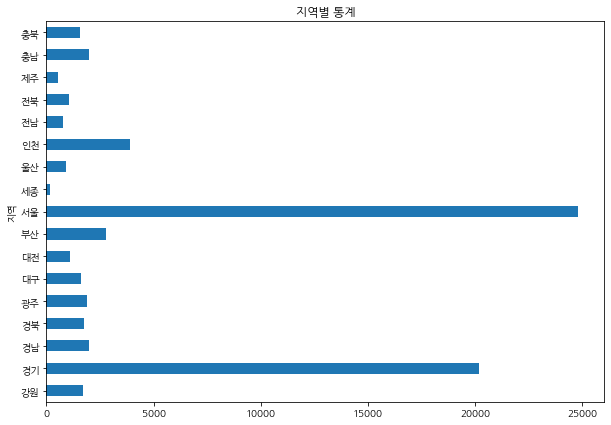

In [824]:
df_covid_region.plot(kind='barh',xlabel='지역',figsize=(10,7),legend=None)
plt.title('지역별 통계')
plt.show()

In [825]:
# By quarantine
df_covid_q = df_covid[df_covid.category.values=='검역']
df_covid_q

,category,time_stamp,num_people,monthly
8847,검역,2020-04-09,10.0,2020-04
8848,검역,2020-04-10,4.0,2020-04
8849,검역,2020-04-11,6.0,2020-04
8850,검역,2020-04-12,18.0,2020-04
8851,검역,2020-04-13,6.0,2020-04
...,...,...,...,...
9149,검역,2021-02-05,7.0,2021-02
9150,검역,2021-02-06,11.0,2021-02
9151,검역,2021-02-07,27.0,2021-02
9152,검역,2021-02-08,9.0,2021-02


In [826]:
df_covid_q = df_covid_q.groupby('monthly').sum()
df_covid_q

,num_people
monthly,
2020-04,108.0
2020-05,88.0
2020-06,190.0
2020-07,462.0
2020-08,168.0
2020-09,157.0
2020-10,268.0
2020-11,438.0
2020-12,320.0


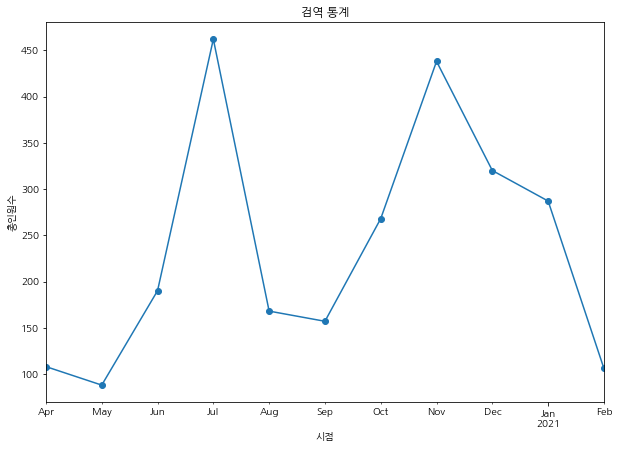

In [827]:
df_covid_q.plot(kind='line',marker='o',figsize=(10,7),legend=None)
plt.xlabel('시점')
plt.ylabel('총인원수')
plt.title('검역 통계')
plt.show()